In [1]:
#Hayder Aziz, machine medicine analysis of left and right hand movemement to track parkinson disease progression
#each hand's data set has a nested list with 3 figures (x, y, confidence score). each reading has 21 nested lists. The values 
#in this data set are 2D only as there's no z axis reading. There are a total of 900 readings for each hand. 

#need to check for speed, amplitude of movement, halts and decrementing amplitude
# for each reading come up with a figure for the above and compare over the time series for 900 figures.

#from the https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md#hand-output-format it can be seen
#that the main points of interest are points 4 (thumb) and 8(index finger). 
#(I will presume they correspond to 4th and 8th of the lists in the JSON files)

#these files only have one set of results and a series of data sets are needed to detect and track changes.


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [2]:
#importing the left and right hand json data into pandas data frames
left_hand_data = pd.DataFrame(pd.read_json('hand_left_keypoints.json', typ='frame'))
right_hand_data = pd.DataFrame(pd.read_json('hand_right_keypoints.json', typ='frame'))

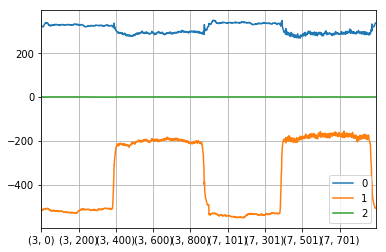

In [104]:
#From the diagram of the hand output format at the CMU perceptual lab, I extract only the time series data for thumbs 
#and index fingers, and put them on a scatter diagram.
left_thumb=pd.DataFrame(left_hand_data[0:899].iloc[0:899,3]).unstack().apply(pd.Series) #load all the thumb data
left_index=pd.DataFrame(left_hand_data[0:899].iloc[0:899,7]).unstack().apply(pd.Series) #load all the index finger data
left_concatenated = pd.concat([left_thumb.assign(dataset='set1'), left_index.assign(dataset='set2')])
left_concatenated.plot(grid=True)

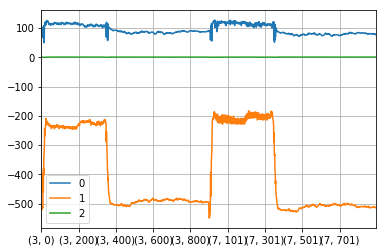

In [105]:
#repeating for the right tumb and index finger
right_thumb=pd.DataFrame(right_hand_data[0:899].iloc[0:899,3]).unstack().apply(pd.Series) #load all the thumb data
right_index=pd.DataFrame(right_hand_data[0:899].iloc[0:899,7]).unstack().apply(pd.Series) #load all the index finger data
right_concatenated = pd.concat([right_thumb.assign(dataset='set1'), right_index.assign(dataset='set2')])
right_concatenated.plot(grid=True)

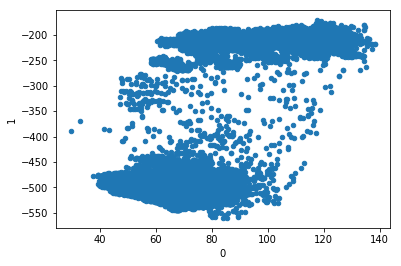

In [4]:
#just a scatter diagram of the right hand data
right_hand_data[0:899].unstack().apply(pd.Series).plot(kind='scatter',x=0,y=1)

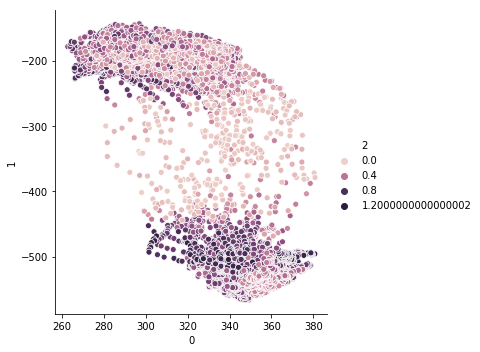

In [6]:
#scatter diagram of left hand with confidence score included. (darker is higher confidence score)
d1=left_hand_data[0:899].unstack().apply(pd.Series)
sns.relplot(x=0, y=1, hue=2, kind="scatter", ci="sd", data=d1);